# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [9]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

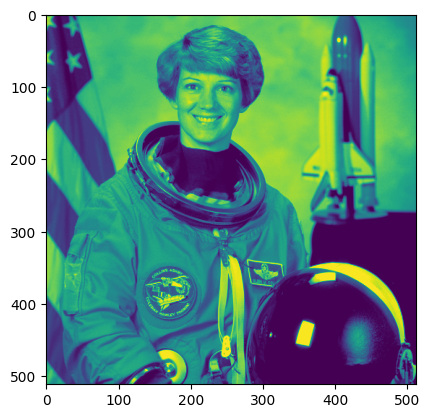

In [5]:
img = plt.imread("data/astronaut.png")
plt.imshow(img)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [ ]:
"""
Handling values out of bounds: All pixels out of bounds will not be considered
The mean will only consider pixels inside of bounds
"""

def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        num_of_cells = 0
        for q in numpy.ndindex(size, size):
            ind0 = p[0] - n + q[0]
            if ind0 < 0:
                continue
            elif ind0  >= (img.shape[0]):
                continue
            ind1 = p[1] - n + q[1]
            if ind1 < 0:
                continue
            elif ind1 >= (img.shape[1]):
                continue
            num_of_cells = num_of_cells + 1
            try:  
                neighborhood_sum = neighborhood_sum + img_in[ind0][ind1]
            except:
                print("p: ", p)
                print("q: ", q)
                print("index0: ", ind0)
                print("index1: ", ind1)
                break
        result[p[0]][p[1]] = neighborhood_sum / num_of_cells
    return result

In [51]:
"""
Handling values out of bounds: 
All pixels with the neighborhood partially outside are skipped
(CORRECT)
"""

def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        if p[0] - n < 0:
            continue
        elif p[0] + n >= img.shape[0]:
            continue
        elif p[1] - n < 0:
            continue
        elif p[1] + n >= img.shape[1]:
            continue
        for q in numpy.ndindex(size, size):
            ind0 = p[0] - n + q[0]
            ind1 = p[1] - n + q[1]
            try:  
                neighborhood_sum = neighborhood_sum + img_in[ind0][ind1]
            except:
                print("p: ", p)
                print("q: ", q)
                print("index0: ", ind0)
                print("index1: ", ind1)
                break
        result[p[0]][p[1]] = neighborhood_sum / size**2
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

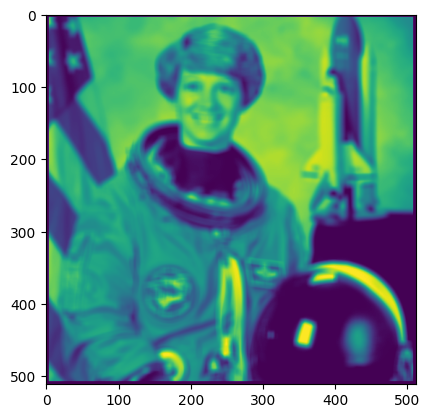

In [52]:
filtered_img = meanfilter(img, 9)
plt.imshow(filtered_img)

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [31]:
img_filtered = meanfilter(img, 5)

assert numpy.allclose(img, img_filtered, atol=1/255)

AssertionError: 

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [48]:
"""
Handling values out of bounds: They're set to value=0
"""

def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_list = []
        for q in numpy.ndindex(size, size):
            ind0 = p[0] - n + q[0]
            if ind0 < 0:
                neighborhood_list.append(0)
                continue
            elif ind0  >= (img.shape[0]):
                neighborhood_list.append(0)
                continue
            ind1 = p[1] - n + q[1]
            if ind1 < 0:
                neighborhood_list.append(0)
                continue
            elif ind1 >= (img.shape[1]):
                neighborhood_list.append(0)
                continue
            neighborhood_list.append(img_in[ind0][ind1])
        result[p[0]][p[1]] = sorted(neighborhood_list)[size**2//2+1]
    
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

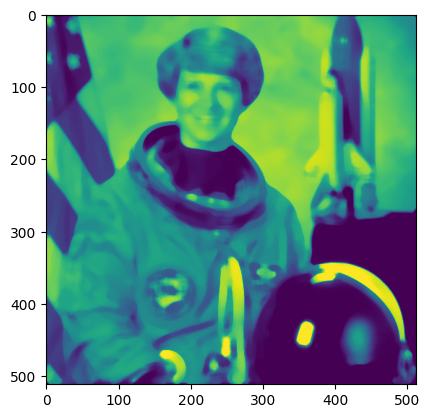

In [49]:
median_filtered_img = medianfilter(img, 11)
plt.imshow(median_filtered_img)

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [38]:
assert numpy.allclose(img, meanfilter(img, 5), atol=1/255)

AssertionError: 

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [39]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

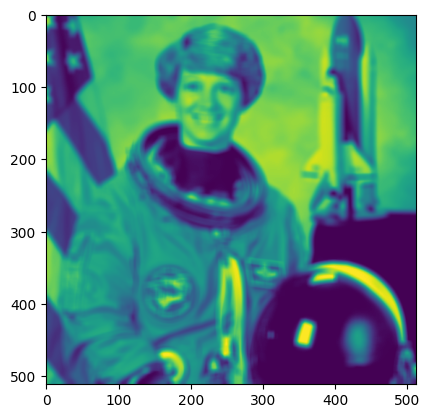

In [43]:
mean_img_scipy = scipy.ndimage.uniform_filter(img, 9)
plt.imshow(mean_img_scipy)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

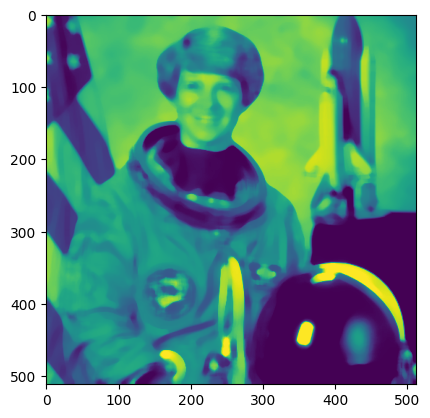

In [47]:
median_img_scipy = scipy.ndimage.median_filter(img, 11)
plt.imshow(median_img_scipy)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

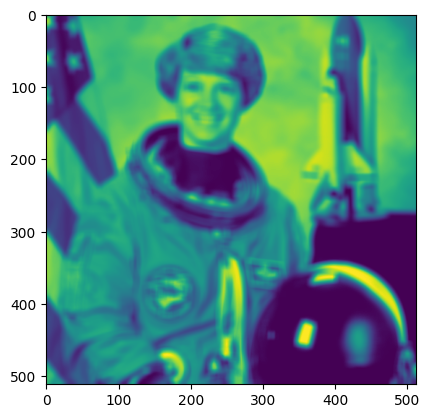

In [46]:
gaussian_img_scipy = scipy.ndimage.uniform_filter(img, 10)
plt.imshow(gaussian_img_scipy)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: